# LGM_Internship

## Task 2 : Stock Price Prediction & Forecasting using Stacked LSTM Algorithm
### - by Fena Jain

### Importing Required Packages

In [1]:
# Importing required libraries for data manipulation
import numpy as np
import pandas as pd

# Importing required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the CSV File

In [2]:
df = pd.read_csv("stocks.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


### Exploratory Data Analysis
#### Descriptive Statistics 

In [3]:
df.head()                    # displays top 5 records

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()                    # display last 5 records

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.info()                  # displays the schema of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.shape                   # displays the shape of the dataframe

(2035, 8)

In [7]:
df.describe()              # displays the descriptive statistics of the data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.columns                 # displays the name of all the columns in the dataframe

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
df.isnull().sum()          # displays any null values found in any column in the dataframe

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
df.duplicated().sum()       # checks for all the duplicated values in the dataframe

0

### Data Preprocessing

In [11]:
df.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95


In [12]:
# Starting with the date column, sorting the dataframe according to the date column

df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

# Sorting the date column
df = df.sort_values(by='Date')
df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
df.reset_index(inplace=True)
df.head(3)

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31


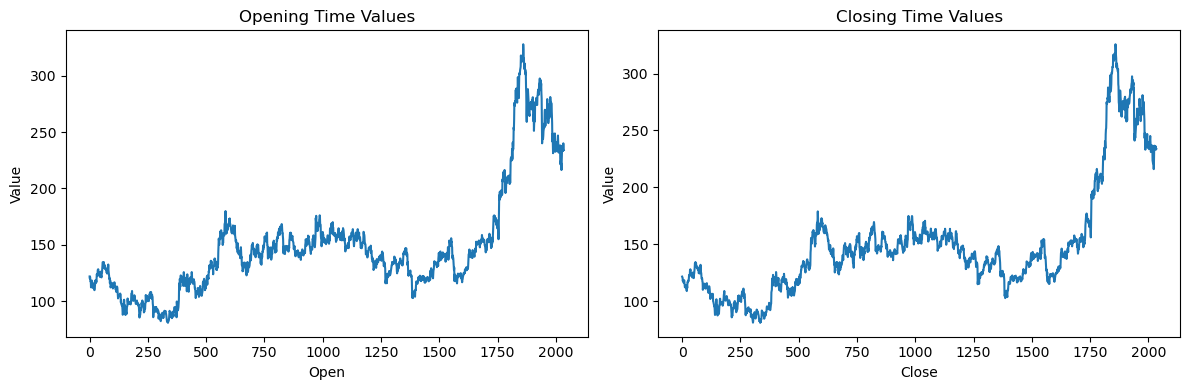

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the "Open" column
axes[0].plot(df["Open"])
axes[0].set_title("Opening Time Values")
axes[0].set_xlabel("Open")
axes[0].set_ylabel("Value")

# Plot the "Close" column
axes[1].plot(df["Close"])
axes[1].set_title("Closing Time Values")
axes[1].set_xlabel("Close")
axes[1].set_ylabel("Value")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
data = df["Close"]
data.head(2)

0    121.55
1    120.90
Name: Close, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler

## LSTM are sensitive to the scale of the data, therefore applying MinMax Scaler

scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))
data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
#Splitting Dataset into train and test data 

training_size = int(len(data) * 0.70)
test_size=len(data)-training_size
train_data = data[:training_size, :]
test_data = df.iloc[training_size:, :1]

In [18]:
training_size,test_size

(1424, 611)

In [19]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    
    # Check if dataset is a DataFrame or a NumPy array
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset.values  # Convert DataFrame to NumPy array
    
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    
    return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Building an Stacked-LSTM Model

In [24]:
# !pip install tensorflow

In [25]:
## Creating the stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 9s 201ms/step - loss: 0.0097 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 3s 159ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 3s 153ms/step - loss: 9.4977e-04 - val_loss: 0.0014
Epoch 4/60
19/19 [==============================] - 3s 146ms/step - loss: 8.7176e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 141ms/step - loss: 8.5003e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 3s 148ms/step - loss: 8.4068e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 135ms/step - loss: 7.9485e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 3s 135ms/step - loss: 7.6389e-04 - val_loss: 9.6699e-04
Epoch 9/60
19/19 [==============================] - 3s 144ms/step - loss: 7.4801e-04 - val_loss: 9.8078e-04
Epoch 10/60
19/19 [==============================] - 3s 142ms/st

In [28]:
# Let's predict and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 2s 33ms/step


In [29]:
# Transform back to original form 

train_predict1 = scaler.inverse_transform(train_predict)
test_predict2 = scaler.inverse_transform(test_predict)

In [30]:
train_predict1

array([[113.975945],
       [112.358246],
       [111.88    ],
       ...,
       [119.61312 ],
       [118.96152 ],
       [118.45516 ]], dtype=float32)

In [31]:
test_predict2

array([[756.8248 ],
       [756.8245 ],
       [756.8243 ],
       [756.8241 ],
       [756.824  ],
       [756.8238 ],
       [756.8236 ],
       [756.8234 ],
       [756.82336],
       [756.8233 ],
       [756.82324],
       [756.8231 ],
       [756.8231 ],
       [756.8232 ],
       [756.8232 ],
       [756.82324],
       [756.8233 ],
       [756.8235 ],
       [756.8236 ],
       [756.8237 ],
       [756.824  ],
       [756.8242 ],
       [756.82434],
       [756.8247 ],
       [756.82495],
       [756.8253 ],
       [756.8257 ],
       [756.826  ],
       [756.82654],
       [756.8269 ],
       [756.8274 ],
       [756.828  ],
       [756.82837],
       [756.82904],
       [756.8296 ],
       [756.8302 ],
       [756.831  ],
       [756.8316 ],
       [756.8323 ],
       [756.83325],
       [756.8339 ],
       [756.8349 ],
       [756.83575],
       [756.8368 ],
       [756.83765],
       [756.8387 ],
       [756.8398 ],
       [756.8408 ],
       [756.84186],
       [756.8432 ],


In [32]:
## Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.01282194410308556

In [33]:
# Test Data RMSE

math.sqrt(mean_squared_error(y_train,train_predict))

0.01282194410308556

In [34]:
# Calculate RMSE performance metrics (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

292.4772683544945

In [35]:
# Test Data RMSE (ytest)
math.sqrt(mean_squared_error(ytest,test_predict))

292.4772683544945

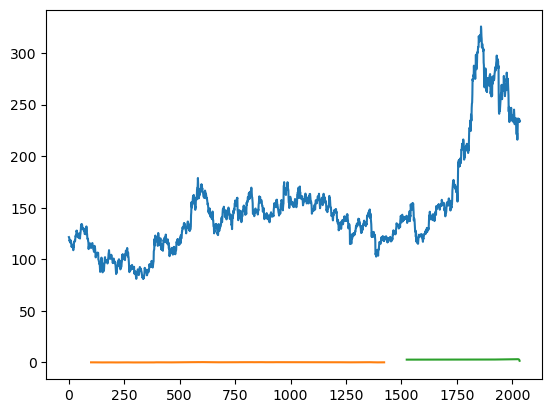

In [36]:
### PLotting
#Shift train prediction for plotting

look_back=100
trainPredictPlot=np.empty_like(data)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

#Shift test prediction for plotting
testPredictPlot=np.empty_like(data)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1,:]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

611

In [38]:
import numpy as np

x_input = test_data[511:].values.reshape(1, -1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[99,
 98,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 88,
 87,
 86,
 85,
 84,
 83,
 82,
 81,
 80,
 79,
 78,
 77,
 76,
 75,
 74,
 73,
 72,
 71,
 70,
 69,
 68,
 67,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0]

In [41]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.3075761]
101
1 day input [98.         97.         96.         95.         94.         93.
 92.         91.         90.         89.         88.         87.
 86.         85.         84.         83.         82.         81.
 80.         79.         78.         77.         76.         75.
 74.         73.         72.         71.         70.         69.
 68.         67.         66.         65.         64.         63.
 62.         61.         60.         59.         58.         57.
 56.         55.         54.         53.         52.         51.
 50.         49.         48.         47.         46.         45.
 44.         43.         42.         41.         40.         39.
 38.         37.         36.         35.         34.         33.
 32.         31.         30.         29.         28.         27.
 26.         25.         24.         23.         22.         21.
 20.         19.         18.         17.         16.         15.
 14.         13.         12.         11.         10.          

8 day output [[1.4354818]]
9 day input [90.         89.         88.         87.         86.         85.
 84.         83.         82.         81.         80.         79.
 78.         77.         76.         75.         74.         73.
 72.         71.         70.         69.         68.         67.
 66.         65.         64.         63.         62.         61.
 60.         59.         58.         57.         56.         55.
 54.         53.         52.         51.         50.         49.
 48.         47.         46.         45.         44.         43.
 42.         41.         40.         39.         38.         37.
 36.         35.         34.         33.         32.         31.
 30.         29.         28.         27.         26.         25.
 24.         23.         22.         21.         20.         19.
 18.         17.         16.         15.         14.         13.
 12.         11.         10.          9.          8.          7.
  6.          5.          4.          3.          2

16 day output [[0.98601264]]
17 day input [82.         81.         80.         79.         78.         77.
 76.         75.         74.         73.         72.         71.
 70.         69.         68.         67.         66.         65.
 64.         63.         62.         61.         60.         59.
 58.         57.         56.         55.         54.         53.
 52.         51.         50.         49.         48.         47.
 46.         45.         44.         43.         42.         41.
 40.         39.         38.         37.         36.         35.
 34.         33.         32.         31.         30.         29.
 28.         27.         26.         25.         24.         23.
 22.         21.         20.         19.         18.         17.
 16.         15.         14.         13.         12.         11.
 10.          9.          8.          7.          6.          5.
  4.          3.          2.          1.          0.          0.30757609
  0.75533569  1.25557446  1.64120674  1.

24 day output [[0.6709947]]
25 day input [74.         73.         72.         71.         70.         69.
 68.         67.         66.         65.         64.         63.
 62.         61.         60.         59.         58.         57.
 56.         55.         54.         53.         52.         51.
 50.         49.         48.         47.         46.         45.
 44.         43.         42.         41.         40.         39.
 38.         37.         36.         35.         34.         33.
 32.         31.         30.         29.         28.         27.
 26.         25.         24.         23.         22.         21.
 20.         19.         18.         17.         16.         15.
 14.         13.         12.         11.         10.          9.
  8.          7.          6.          5.          4.          3.
  2.          1.          0.          0.30757609  0.75533569  1.25557446
  1.64120674  1.8297168   1.84266853  1.74285781  1.59089041  1.43548179
  1.30695379  1.21600521  1.15817

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
len(data)

2035

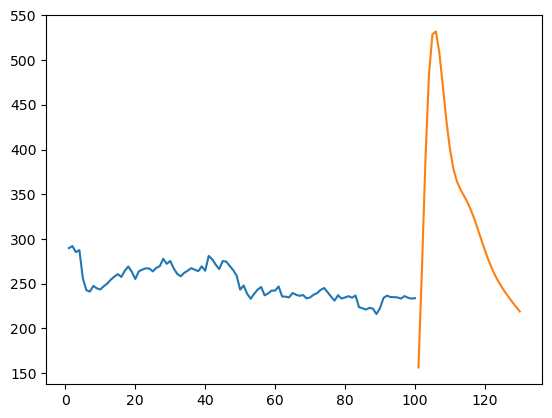

In [44]:
plt.plot(day_new,scaler.inverse_transform(data[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

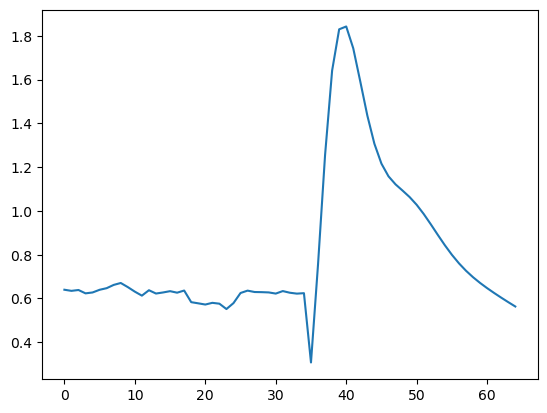

In [45]:
df1 = data.tolist()
df1.extend(lst_output)
plt.plot(df1[2000:])

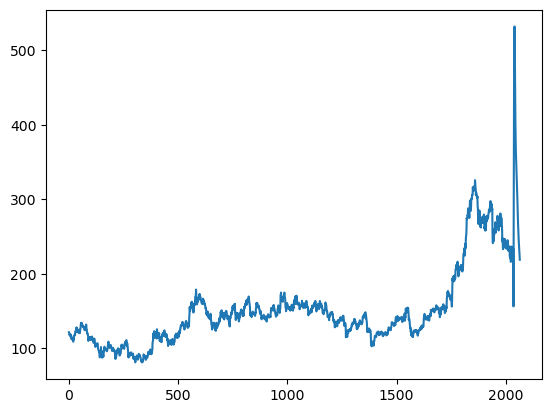

In [46]:
df1 = scaler.inverse_transform(df1).tolist()
plt.plot(df1)

### Results


The precise application and training of the Stacked LSTM model determine the outcome of the Stock Market Prediction and Forecasting assignment. We can get predictions and projections for future stock prices by developing the algorithm on existing stock price data.


Evaluation metrics like mean absolute error (MAE) as well as root mean square error (RMSE) can be used to assess the model's performance. Better prediction accuracy is shown by lower values for these parameters. The performance of the algorithm can also be evaluated visually by comparing the anticipated with actual stock prices using visualisations like line graphs.

### Conclusion

In this Python project, we utilized stacked LSTM (Long Short-Term Memory) to predict and forecast stock prices. The objective was to develop a model capable of capturing complex patterns and dependencies in historical stock data, enabling us to make accurate predictions of future stock prices.

We began by preprocessing the stock price dataset, including steps such as normalization and splitting into training and test sets. We then constructed the stacked LSTM model, a type of recurrent neural network (RNN) that excels at capturing long-term dependencies in sequential data.

The model was trained on the training dataset, with the input sequences being fed into multiple LSTM layers stacked on top of each other. This architecture allowed the model to learn hierarchical representations of the data, enabling it to capture intricate patterns and trends.

After training, we evaluated the model's performance on the test dataset. We assessed its accuracy using appropriate metrics, such as mean squared error or mean absolute error. The evaluation results provided insights into the model's predictive capabilities and its ability to generalize to unseen data.

Finally, we utilized the trained model for forecasting future stock prices. By inputting a sequence of historical stock data, the model generated predictions for the next time steps. These forecasts could assist investors and traders in making informed decisions and developing effective investment strategies.

Overall, this project demonstrated the effectiveness of stacked LSTM in stock price prediction and forecasting. The model's ability to capture temporal dependencies and uncover complex patterns makes it a valuable tool for analyzing and predicting stock market trends.